In [2]:
import numpy as np
import cmath


# a sine generation class

In [3]:
class waveGen:
	
	def __init__(self, freq, BufferSize, waveType, vol):
		
		self.sampleRate = 48000
		self.bufferSize = BufferSize
		self.buffer = np.empty(BufferSize, dtype=np.complex)
		self.frequency = freq
		self.omega = 0
		self.updateOmega()
		self.last = complex(1,0)
		self.type = waveType
		self.volume = vol

	def sineGen(self):

		#start = timer() #reduce function!!! functools
		for i in range(0, self.bufferSize):
			self.buffer[i] = self.last
			self.last=self.last*self.omega

		return self.volume * np.imag(self.buffer).astype(np.float32)

	def squareGen(self):
		#start = timer()
		for i in range(0, self.bufferSize):
			self.buffer[i] = np.sign(self.last)
			self.last=self.last*self.omega

		return np.real(self.volume * self.buffer).astype(np.float32)

	def updateOmega(self):
		self.omega = cmath.exp(1j*(2*cmath.pi * self.frequency / self.sampleRate))

	def updateFreq(self, val):
		self.frequency = val
		self.updateOmega()

	def nextFrame(self):
		if self.type == "sine":
			return self.sineGen()
		elif self.type == "square":
			return self.squareGen()
		elif self.type == "triangle":
			return self.triangleGen()







# create sin wave 

In [4]:
wave = waveGen(440, 100, 'sine', .3)

In [5]:
output = wave.nextFrame()
for i in range(2): output = np.append(output, wave.nextFrame())

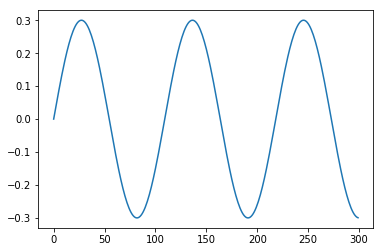

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(output)
plt.show()



# to convert to square wave

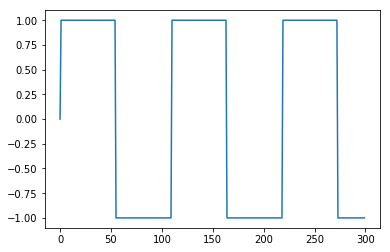

In [7]:
plt.plot(np.sign(output))
plt.show()

# or create square wave generator 

In [8]:
square = waveGen(440, 100, 'square', .3)
    

In [9]:
square_output = square.nextFrame()
for i in range(2): square_output = np.append(square_output, square.nextFrame())


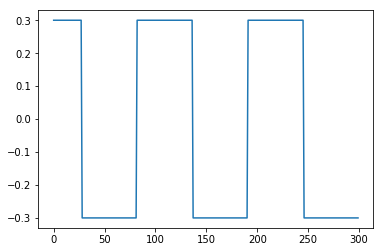

In [10]:
plt.plot(square_output)
plt.show()

# or combine the two

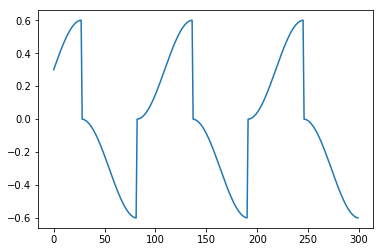

In [11]:
both = output + square_output
plt.plot(both)
plt.show()

# To create noise 

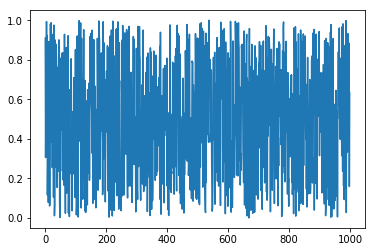

In [12]:
noise = np.random.rand(1000)
plt.plot(noise)
plt.show()